# <font color='green'>Import modules</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Configure Pandas to show all columns
pd.set_option("display.max.columns", None)

# <font color='green'>Read Train and kaggle Test sets</font>

In [3]:
# read train and test datasets
train_set = pd.read_csv("../datasets/Output Data/train_Prepro.csv")
kaggle_test_set = pd.read_csv("../datasets/Output Data/test_Prepro.csv")

In [4]:
train_set.shape

(2041, 200)

In [5]:
kaggle_test_set.shape

(879, 199)

# <font color='green'>Ridge Regularization Baseline</font>

In [6]:
features = [n for n in train_set.columns if n not in ['id', 'pid','saleprice']]
X = train_set[features]
y = train_set['saleprice']
kaggle_X = kaggle_test_set[features]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [8]:
ss = StandardScaler()
ss.fit(X_train)

X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)
X_ss = ss.transform(X)
kaggle_test_ss = ss.transform(kaggle_X)

In [9]:
ridge = RidgeCV(alphas=np.logspace(0, 10, 200))

In [10]:
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=6)
print(f"ridge cv r-sqrt max: {round(ridge_scores.max(), 3)}")
print(f"ridge cv r-sqrt min {round(ridge_scores.min(), 3)}")
print(f"ridge cv r-sqrt mean: {round(ridge_scores.mean(), 3)}")
print(f"Range cv scores: {round(ridge_scores.max() - ridge_scores.min(),3)}")

ridge cv r-sqrt max: 0.923
ridge cv r-sqrt min 0.89
ridge cv r-sqrt mean: 0.904
Range cv scores: 0.032


In [11]:
ridge_model = ridge.fit(X_train_ss, y_train)
ridge_train_score = ridge_model.score(X_train_ss, y_train)
ridge_test_score = ridge_model.score(X_test_ss, y_test)

print(f"ridge train r-sqrt: {round(ridge_train_score, 3)}")
print(f"ridge test r-sqrt: {round(ridge_test_score, 3)}")
print(f"r-sqrt difference: {round((ridge_train_score - ridge_test_score), 4)}")

ridge train r-sqrt: 0.926
ridge test r-sqrt: 0.911
r-sqrt difference: 0.015


In [12]:
prediction = ridge_model.predict(X_ss)
residuals = y - prediction

full_train_score = ridge_model.score(X_ss, y)
full_train_mse = mean_squared_error(y, prediction)
full_train_rmse = np.sqrt(full_train_mse)
full_train_coef = ridge_model.coef_
full_train_intercept = ridge_model.intercept_

print(f"Full Train set ridge r-sqrt: {round(full_train_score,3)}")
print(f"Full Train set ridge mse: {round(full_train_mse)}")
print(f"Full Train set ridge rmse: {round(full_train_rmse)}")
print(f"Full Train set ridge optimal alpha: {round(ridge_model.alpha_,0)}")
print(f" Train set ridge intercept: {round(full_train_intercept)}")
# print(f" Train set coef: {full_train_coef}")

Full Train set ridge r-sqrt: 0.924
Full Train set ridge mse: 479587960.0
Full Train set ridge rmse: 21899.0
Full Train set ridge optimal alpha: 129.0
 Train set ridge intercept: 179681.0


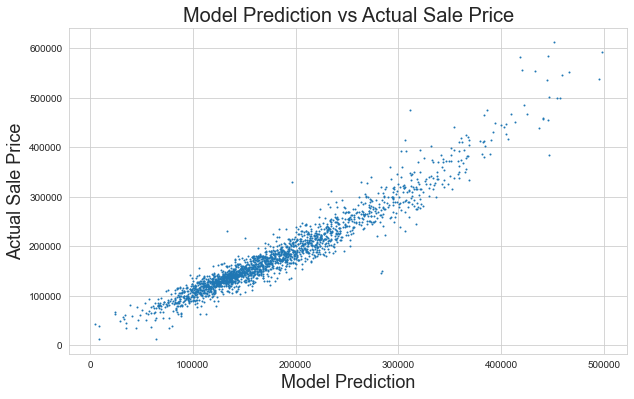

In [13]:
plt.figure(figsize=(10,6))

plt.scatter(prediction, y, s=1);

plt.xlabel("Model Prediction", fontsize=18)
plt.ylabel("Actual Sale Price", fontsize=18)
plt.title("Model Prediction vs Actual Sale Price", fontsize=20);

Text(0.5, 1.0, 'Residuals Histogram')

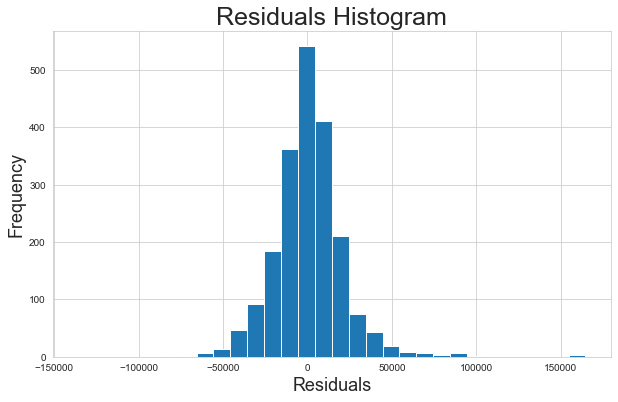

In [14]:
plt.figure(figsize=(10,6))

plt.hist(residuals, bins=30);

plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Residuals Histogram", fontsize=25)

In [15]:
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(25)

,variable,coef,abs_coef
25,gr_liv_area,10592.860072,10592.860072
4,overall_qual,10544.492990,10544.492990
22,1st_flr_sf,8483.923595,8483.923595
15,bsmtfin_sf_1,7512.236325,7512.236325
19,total_bsmt_sf,6806.652018,6806.652018
8,mas_vnr_area,6232.447200,6232.447200
6,year_built,5781.831027,5781.831027
0,lot_area,5714.581599,5714.581599
104,neighborhood_NridgHt,5485.634052,5485.634052
110,neighborhood_StoneBr,5156.692757,5156.692757


In [16]:
ridge_coefs.tail(10)

,variable,coef,abs_coef
135,roof_matl_WdShngl,-39.558293,39.558293
64,ms_subclass_85,37.506896,37.506896
144,foundation_Stone,-34.325668,34.325668
163,sale_type_CWD,28.329508,28.329508
155,garage_type_CarPort,-25.542978,25.542978
190,exterior_Plywood,-22.259619,22.259619
119,house_style_1.5Unf,17.857867,17.857867
189,exterior_Other,0.000000,0.000000
191,exterior_PreCast,0.000000,0.000000
72,ms_zoning_I (all),0.000000,0.000000


# <font color='red'>kaggle test set prediction</font>

In [17]:
kaggle_test_set_prediction = ridge_model.predict(kaggle_test_ss)

kaggle_test_set_prediction = pd.Series(kaggle_test_set_prediction)

df = pd.concat([kaggle_test_set['id'], kaggle_test_set_prediction], axis=1)
df.rename(columns={"id": "Id", 0: "SalePrice"}, inplace=True)
df.head()

,Id,SalePrice
0,2658,130546.382095
1,2718,159060.816195
2,2414,224613.763887
3,1989,105558.899152
4,625,178376.757843


In [18]:
df.to_csv('../datasets/Output Data/ridge_BL.csv', index=False)

# <font color='green'>Optimization A</font> 

##### <font color='green'>gr_liv_area has the largest coef. Therefore predict price is expected to be sensitive to this feature. There were 2 outliers for this data column. This 2 rows also show up as outliers in bsmtfin_sf_1, 1st_flr_sf, total_bsmt_sf. Therefore these 2 point can be consider as rather abnormal. Before and after model eval shows improvement to R2 and RMSE</font> 

# <font color='green'>Optimization B</font> 

##### <font color='green'>lot_area is also among the top 20 the largest coef. Therefore predict price is expected to be sensitive to this feature. There were 2 outliers for this data column and can be consider as rather abnormal. Before and after model eval shows improvement to RMSE with slight R2 score drop</font> 

# <font color='green'>Optimization C</font> 

##### <font color='green'>Both gr_liv_area and 1st_flr_sf are among the top 3 largest coeff. From earlier pair plots, they have show strong colinearity. We explore dropping 1st_flr_sf from the feature list</font> 

In [19]:
features = [n for n in train_set.columns if n not in ['id', 'pid',
                                                      'saleprice', 
                                                      '1st_flr_sf']]
X = train_set[features]
y = train_set['saleprice']
kaggle_X = kaggle_test_set[features]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [21]:
ss = StandardScaler()
ss.fit(X_train)

X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)
X_ss = ss.transform(X)
kaggle_test_ss = ss.transform(kaggle_X)

In [22]:
ridge = RidgeCV(alphas=np.logspace(0, 10, 200))

In [23]:
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=6)
print(f"ridge cv r-sqrt max: {round(ridge_scores.max(), 3)}")
print(f"ridge cv r-sqrt min {round(ridge_scores.min(), 3)}")
print(f"ridge cv r-sqrt mean: {round(ridge_scores.mean(), 3)}")
print(f"Range cv scores: {round(ridge_scores.max() - ridge_scores.min(),3)}")

ridge cv r-sqrt max: 0.919
ridge cv r-sqrt min 0.888
ridge cv r-sqrt mean: 0.909
Range cv scores: 0.031


In [24]:
ridge_model = ridge.fit(X_train_ss, y_train)
ridge_train_score = ridge_model.score(X_train_ss, y_train)
ridge_test_score = ridge_model.score(X_test_ss, y_test)

print(f"ridge train r-sqrt: {round(ridge_train_score, 3)}")
print(f"ridge test r-sqrt: {round(ridge_test_score, 3)}")
print(f"r-sqrt difference: {round((ridge_train_score - ridge_test_score), 4)}")

ridge train r-sqrt: 0.928
ridge test r-sqrt: 0.9
r-sqrt difference: 0.0279


In [25]:
prediction = ridge_model.predict(X_ss)
residuals = y - prediction

full_train_score = ridge_model.score(X_ss, y)
full_train_mse = mean_squared_error(y, prediction)
full_train_rmse = np.sqrt(full_train_mse)
full_train_coef = ridge_model.coef_
full_train_intercept = ridge_model.intercept_

print(f"Full Train set ridge r-sqrt: {round(full_train_score,3)}")
print(f"Full Train set ridge mse: {round(full_train_mse)}")
print(f"Full Train set ridge rmse: {round(full_train_rmse)}")
print(f"Full Train set ridge optimal alpha: {round(ridge_model.alpha_,0)}")
# print(f" Train set ridge intercept: {round(full_train_intercept)}")
# print(f" Train set coef: {full_train_coef}")

Full Train set ridge r-sqrt: 0.925
Full Train set ridge mse: 473617532.0
Full Train set ridge rmse: 21763.0
Full Train set ridge optimal alpha: 81.0


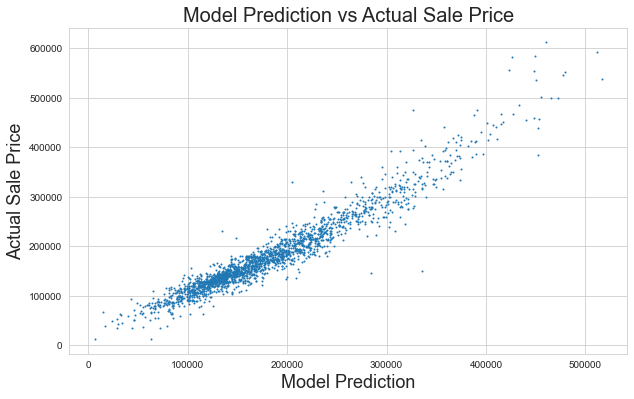

In [26]:
plt.figure(figsize=(10,6))

plt.scatter(prediction, y, s=1);

plt.xlabel("Model Prediction", fontsize=18)
plt.ylabel("Actual Sale Price", fontsize=18)
plt.title("Model Prediction vs Actual Sale Price", fontsize=20);

Text(0.5, 1.0, 'Residuals Histogram')

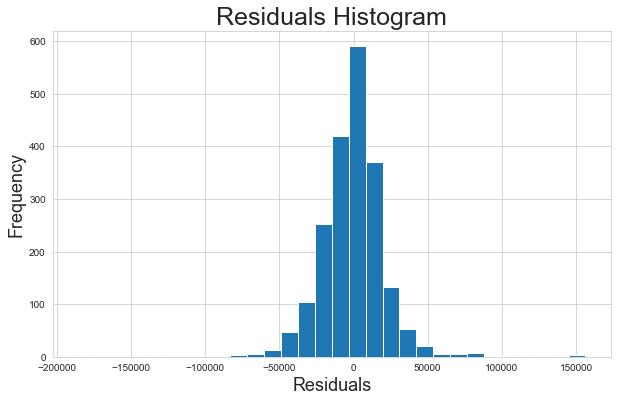

In [27]:
plt.figure(figsize=(10,6))

plt.hist(residuals, bins=30);

plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Residuals Histogram", fontsize=25)

In [28]:
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(15)

,variable,coef,abs_coef
24,gr_liv_area,18426.714818,18426.714818
4,overall_qual,10615.103130,10615.103130
19,total_bsmt_sf,9171.031979,9171.031979
15,bsmtfin_sf_1,8365.555381,8365.555381
8,mas_vnr_area,6540.171680,6540.171680
6,year_built,6382.022269,6382.022269
0,lot_area,6258.555140,6258.555140
103,neighborhood_NridgHt,5336.145297,5336.145297
9,exter_qual,5300.341823,5300.341823
109,neighborhood_StoneBr,5094.429783,5094.429783


In [29]:
ridge_coefs.tail(10)

,variable,coef,abs_coef
146,heating_GasW,66.456537,66.456537
166,sale_type_ConLw,-63.800879,63.800879
56,ms_subclass_40,59.653949,59.653949
85,lot_config_Inside,28.463999,28.463999
50,fence,22.435936,22.435936
89,neighborhood_BrkSide,-7.359454,7.359454
164,sale_type_ConLD,-1.563694,1.563694
160,misc_feature_Shed,-0.803989,0.803989
188,exterior_Other,0.000000,0.000000
190,exterior_PreCast,0.000000,0.000000


# <font color='red'>kaggle test set prediction</font>

In [30]:
kaggle_test_set_prediction = ridge_model.predict(kaggle_test_ss)

kaggle_test_set_prediction = pd.Series(kaggle_test_set_prediction)

df = pd.concat([kaggle_test_set['id'], kaggle_test_set_prediction], axis=1)
df.rename(columns={"id": "Id", 0: "SalePrice"}, inplace=True)
df.head()

,Id,SalePrice
0,2658,139124.255553
1,2718,158894.960681
2,2414,223088.298744
3,1989,111489.891653
4,625,180215.283835


In [31]:
df.to_csv('../datasets/Output Data/ridge_opti_c.csv', index=False)

# <font color='green'>Model Optimization History</font> 

| Optimization|Actions|cv score range|train-test split score diff|R2|RMSE|kaggle rmse score|
|-|-|-|-|-|-|-|
|Baseline|NA|0.095|0.0229|0.891|26,122.0|35,290|
|Opti A|gr_liv_area outlier delete|0.016|0.0388|0.924|21,817.0|28,952|
|Opti B|lot_area outlier delete|0.042|0.042|0.926|21,606.0|28,952|
|Opti C|drop 1st_flr_sf|0.040|0.017|0.926|21,564.0|27,658|